In [63]:
import dyadictree
from importlib import reload
reload(dyadictree)
import numpy as np
import matplotlib.pyplot as plt

In [41]:
X = np.random.uniform(0,1,1000)
y = np.exp(-2*(X-0.3)**2) + np.exp(-200*(X-0.8)**2)
X = X.reshape(-1,1)
domain = np.array([[0.0,1.0]])

In [42]:
def test_dyadic_tree(max_depth,min_samples_split, min_samples_leaf,max_leaf_nodes):
    dtr = dyadictree.DyadicTreeRegressor(domain,
                                     criterion=dyadictree.criterion_variance_reduction,
                                     max_depth=max_depth,
                                     min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,
                                     max_leaf_nodes=max_leaf_nodes)
    dtr._fit(X,y)
    plt.scatter(X.flatten(), y, color="black", s=10)
    dtr.plot(plt)
    plt.show()

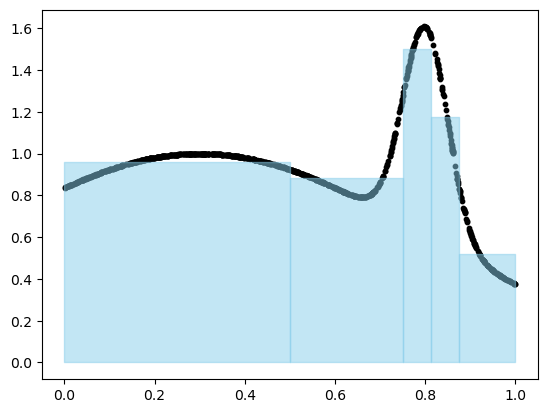

In [43]:
test_dyadic_tree(5,1,1,5)

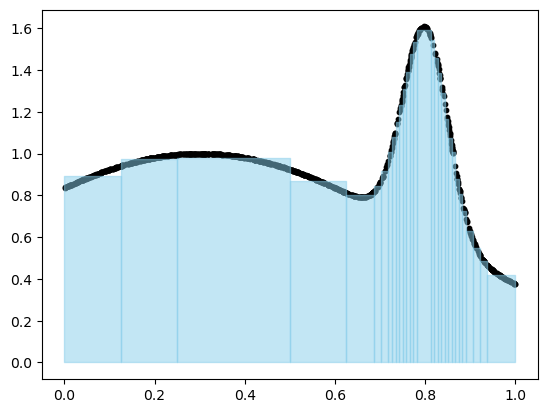

In [44]:
test_dyadic_tree(10,1,1,30)

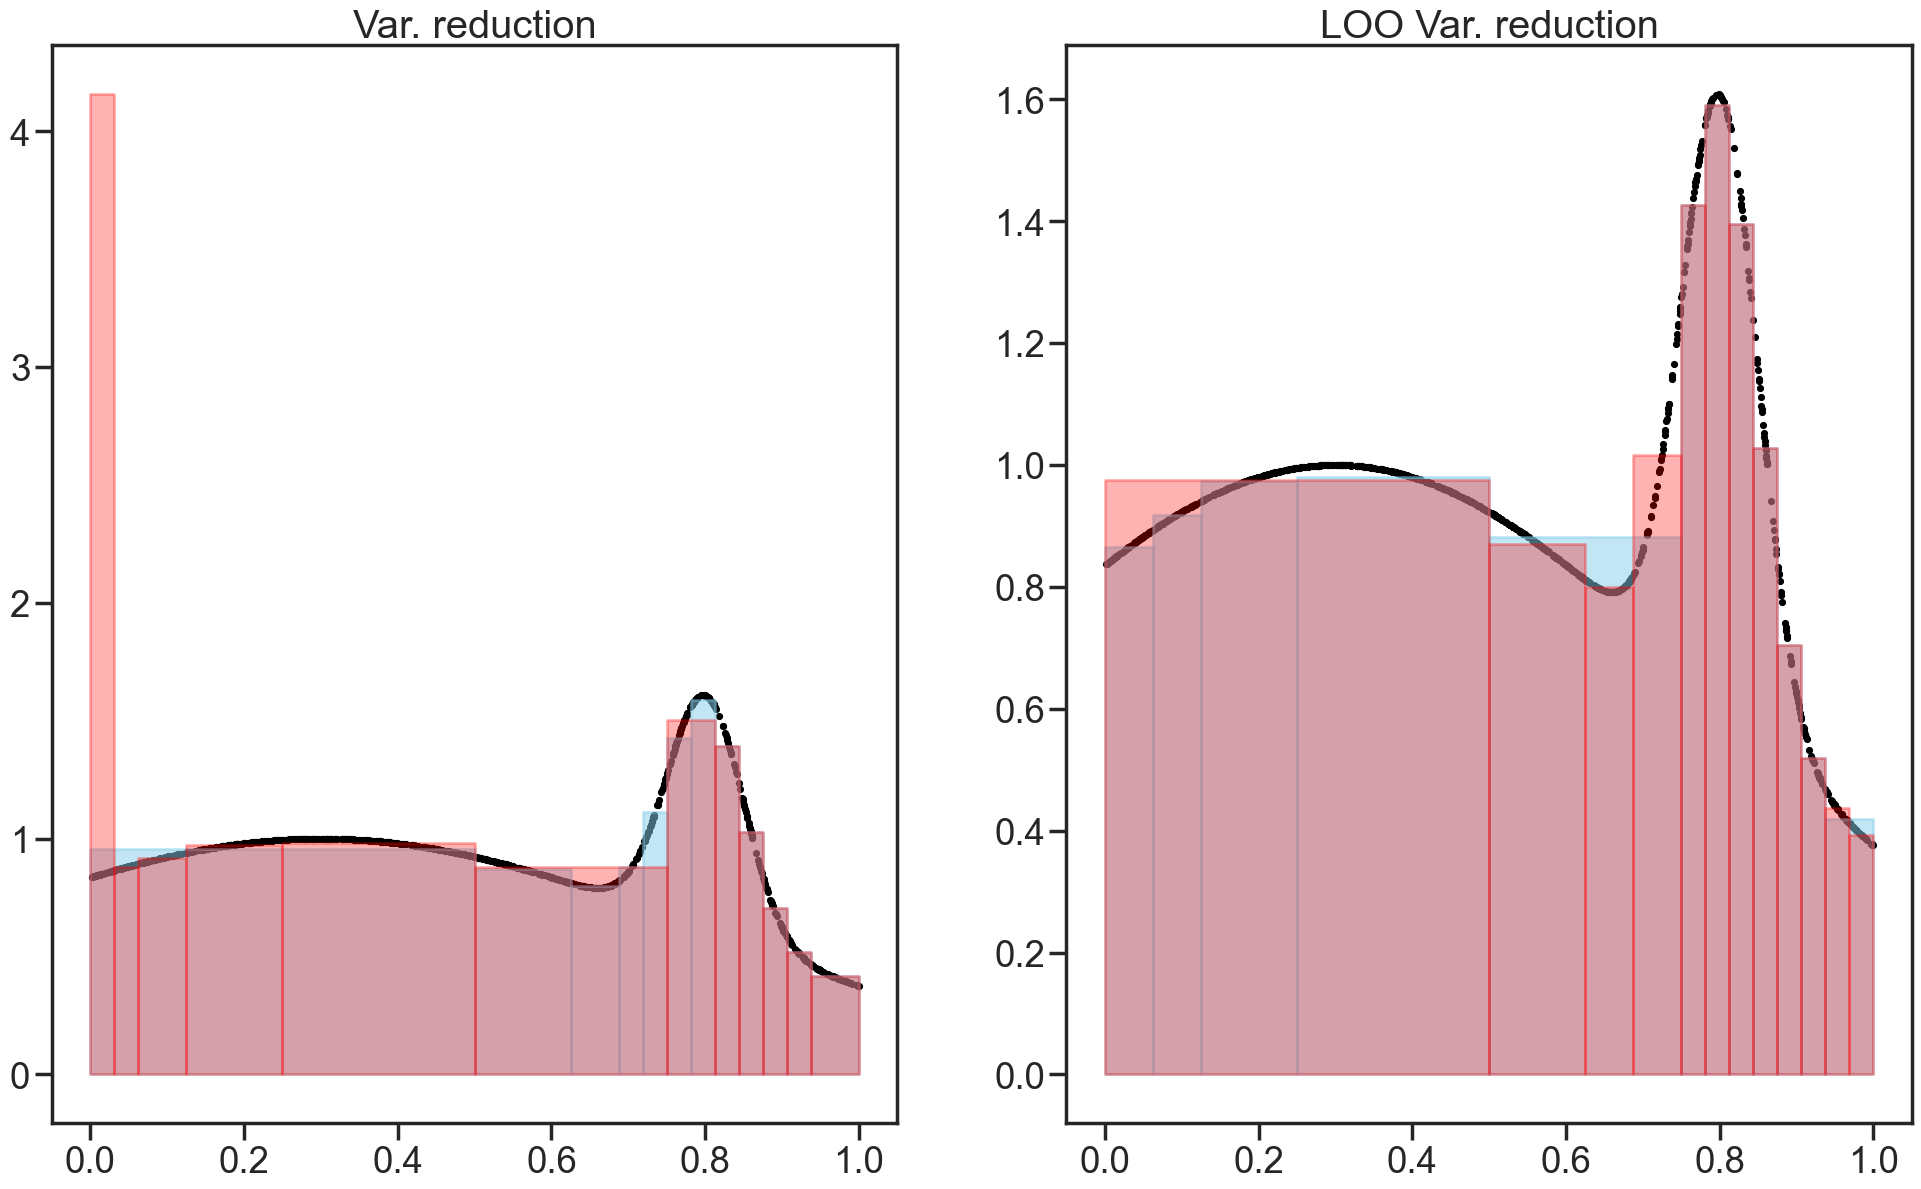

In [70]:
import seaborn as sns
sns.set(style="ticks", context="poster", font_scale=1.2)
# Standard variance reduction
dtr = dyadictree.DyadicTreeRegressor(domain,
                                     criterion=dyadictree.criterion_variance_reduction,
                                     max_depth=5,
                                     min_samples_split=1,
                                     min_samples_leaf=1,
                                     max_leaf_nodes=12)
fig, ax = plt.subplots(1,2,figsize=(24,14))
dtr._fit(X,y)
ax[0].scatter(X.flatten(), y, color="black", s=10)
dtr.plot(ax[0])


mod_y = np.copy(y)
mod_y[1] = 100
dtr._fit(X,mod_y)
dtr.plot(ax[0], color='red', alpha=0.3)
ax[0].set_title("Var. reduction")

# LOO variance reduction
dtr = dyadictree.DyadicTreeRegressor(domain,
                                     criterion=dyadictree.criterion_loo_variance_reduction,
                                     max_depth=5,
                                     min_samples_split=1,
                                     min_samples_leaf=1,
                                     max_leaf_nodes=12)
dtr._fit(X,y)
ax[1].scatter(X.flatten(), y, color="black", s=10)
dtr.plot(ax[1])


mod_y = np.copy(y)
mod_y[1] = 10
dtr._fit(X,mod_y)
dtr.plot(ax[1], color='red', alpha=0.3)
ax[1].set_title("LOO Var. reduction")


plt.show()